## Part 1: Linear Data

In [4]:
# import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import sklearn as skl
import tensorflow as tf

In [2]:
# generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# create a DataFrame with dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

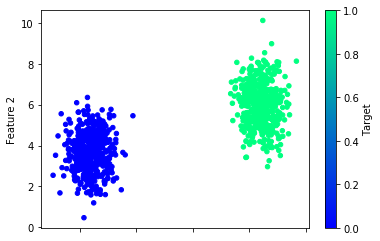

In [3]:
# plot dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [6]:
# split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# fit the scaler
X_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# create a Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# add first dense layer (including input layer)
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [11]:
# add output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
# view structure of Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [13]:
# compile the model and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# fit the model to training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7848 - accuracy: 0.4933
Epoch 2/100
750/750 [==============================] - 0s 53us/sample - loss: 0.7650 - accuracy: 0.5093
Epoch 3/100
750/750 [==============================] - 0s 59us/sample - loss: 0.7474 - accuracy: 0.5320
Epoch 4/100
750/750 [==============================] - 0s 59us/sample - loss: 0.7321 - accuracy: 0.5493
Epoch 5/100
750/750 [==============================] - 0s 55us/sample - loss: 0.7184 - accuracy: 0.5613
Epoch 6/100
750/750 [==============================] - 0s 54us/sample - loss: 0.7058 - accuracy: 0.5773
Epoch 7/100
750/750 [==============================] - 0s 55us/sample - loss: 0.6941 - accuracy: 0.5933
Epoch 8/100
750/750 [==============================] - 0s 62us/sample - loss: 0.6836 - accuracy: 0.6053
Epoch 9/100
750/750 [==============================] - 0s 57us/sample - loss: 0.6733 - accuracy: 0.6200
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 70us/sample - loss: 0.1744 - accuracy: 0.9733
Epoch 79/100
750/750 [==============================] - 0s 63us/sample - loss: 0.1703 - accuracy: 0.9733
Epoch 80/100
750/750 [==============================] - 0s 54us/sample - loss: 0.1663 - accuracy: 0.9760
Epoch 81/100
750/750 [==============================] - 0s 56us/sample - loss: 0.1624 - accuracy: 0.9760
Epoch 82/100
750/750 [==============================] - 0s 55us/sample - loss: 0.1585 - accuracy: 0.9787
Epoch 83/100
750/750 [==============================] - 0s 53us/sample - loss: 0.1547 - accuracy: 0.9800
Epoch 84/100
750/750 [==============================] - 0s 54us/sample - loss: 0.1510 - accuracy: 0.9827
Epoch 85/100
750/750 [==============================] - 0s 58us/sample - loss: 0.1475 - accuracy: 0.9840
Epoch 86/100
750/750 [==============================] - 0s 75us/sample - loss: 0.1440 - accuracy: 0.9840
Epoch 87/100
750/750 [==============================] - 0s 77us/samp

In [15]:
# create DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

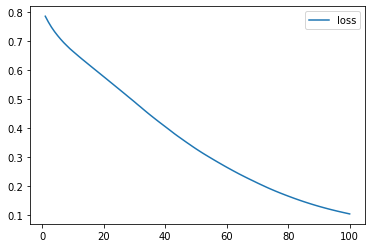

In [16]:
# plot the loss history
history_df.plot(y='loss')

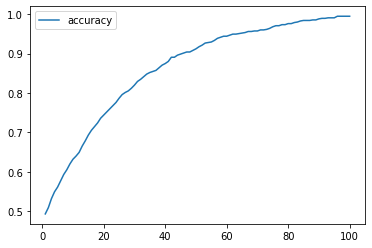

In [17]:
# plot accuracy history
history_df.plot(y='accuracy')

In [18]:
# evaluate the model using testing data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

250/1 - 0s - loss: 0.0834 - accuracy: 0.9960
Loss: 0.10182771563529969, Accuracy: 0.9959999918937683


In [19]:
# predict classification of new dummy data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)

nn_model.predict_classes(new_X)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

## Part 2: Non-Linear Data

In [20]:
# import dependency
from sklearn.datasets import make_moons

In [21]:
# create dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# transform y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# create DataFrame to plot nonlinear data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
df_moons['Target'] = y_moons

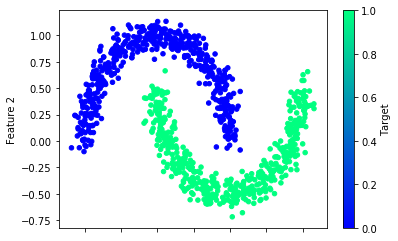

In [22]:
# plot dummy data
df_moons.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [23]:
# split data into training/testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# create scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# fit the scaler
X_moon_scaler.fit(X_moon_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
# scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [25]:
# train model with nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 142us/sample - loss: 1.5159 - accuracy: 0.3187
Epoch 2/100
750/750 [==============================] - 0s 57us/sample - loss: 1.3143 - accuracy: 0.3440
Epoch 3/100
750/750 [==============================] - 0s 52us/sample - loss: 1.1845 - accuracy: 0.3667
Epoch 4/100
750/750 [==============================] - 0s 60us/sample - loss: 1.0939 - accuracy: 0.3907
Epoch 5/100
750/750 [==============================] - 0s 56us/sample - loss: 1.0275 - accuracy: 0.4107
Epoch 6/100
750/750 [==============================] - 0s 59us/sample - loss: 0.9750 - accuracy: 0.4293
Epoch 7/100
750/750 [==============================] - 0s 58us/sample - loss: 0.9300 - accuracy: 0.4413
Epoch 8/100
750/750 [==============================] - 0s 56us/sample - loss: 0.8900 - accuracy: 0.4560
Epoch 9/100
750/750 [==============================] - 0s 57us/sample - loss: 0.8562 - accuracy: 0.4667
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 56us/sample - loss: 0.3458 - accuracy: 0.8533
Epoch 79/100
750/750 [==============================] - 0s 52us/sample - loss: 0.3427 - accuracy: 0.8573
Epoch 80/100
750/750 [==============================] - 0s 54us/sample - loss: 0.3394 - accuracy: 0.8627
Epoch 81/100
750/750 [==============================] - 0s 54us/sample - loss: 0.3362 - accuracy: 0.8627
Epoch 82/100
750/750 [==============================] - 0s 54us/sample - loss: 0.3329 - accuracy: 0.8640
Epoch 83/100
750/750 [==============================] - 0s 56us/sample - loss: 0.3298 - accuracy: 0.8680
Epoch 84/100
750/750 [==============================] - 0s 58us/sample - loss: 0.3269 - accuracy: 0.8693
Epoch 85/100
750/750 [==============================] - 0s 70us/sample - loss: 0.3240 - accuracy: 0.8707
Epoch 86/100
750/750 [==============================] - 0s 58us/sample - loss: 0.3214 - accuracy: 0.8720
Epoch 87/100
750/750 [==============================] - 0s 54us/samp

In [26]:
# create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history['loss'])+1))

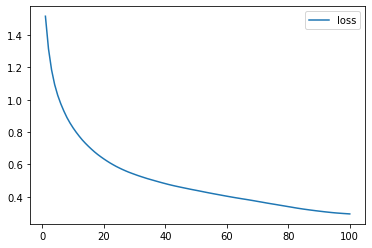

In [27]:
# plot the loss
history_df.plot(y='loss')

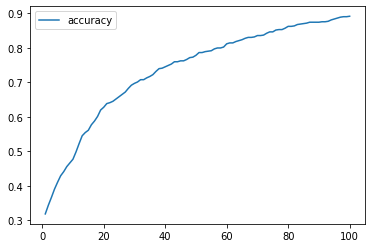

In [28]:
# plot the accuracy
history_df.plot(y='accuracy')

## Part 3: Multi-Neuron Hidden Layer

In [29]:
# generate new Sequential model
new_model = tf.keras.models.Sequential()

In [30]:
# add input and hidden layer
num_inputs = 2
num_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=num_hidden_nodes, activation='relu', input_dim=num_inputs))

In [31]:
# add output layer using probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
# compile the Sequential model and customize metrics
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model to training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 860us/sample - loss: 0.6520 - accuracy: 0.4533
Epoch 2/100
750/750 [==============================] - 0s 58us/sample - loss: 0.6243 - accuracy: 0.6107
Epoch 3/100
750/750 [==============================] - 0s 56us/sample - loss: 0.5999 - accuracy: 0.7493
Epoch 4/100
750/750 [==============================] - 0s 57us/sample - loss: 0.5785 - accuracy: 0.7627
Epoch 5/100
750/750 [==============================] - 0s 59us/sample - loss: 0.5591 - accuracy: 0.7733
Epoch 6/100
750/750 [==============================] - 0s 54us/sample - loss: 0.5409 - accuracy: 0.7827
Epoch 7/100
750/750 [==============================] - 0s 59us/sample - loss: 0.5231 - accuracy: 0.7880
Epoch 8/100
750/750 [==============================] - 0s 55us/sample - loss: 0.5059 - accuracy: 0.7947
Epoch 9/100
750/750 [==============================] - 0s 62us/sample - loss: 0.4888 - accuracy: 0.7987
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 54us/sample - loss: 0.2052 - accuracy: 0.9133
Epoch 79/100
750/750 [==============================] - 0s 57us/sample - loss: 0.2040 - accuracy: 0.9147
Epoch 80/100
750/750 [==============================] - 0s 54us/sample - loss: 0.2028 - accuracy: 0.9147
Epoch 81/100
750/750 [==============================] - 0s 56us/sample - loss: 0.2016 - accuracy: 0.9147
Epoch 82/100
750/750 [==============================] - 0s 52us/sample - loss: 0.2004 - accuracy: 0.9147
Epoch 83/100
750/750 [==============================] - 0s 55us/sample - loss: 0.1990 - accuracy: 0.9147
Epoch 84/100
750/750 [==============================] - 0s 52us/sample - loss: 0.1979 - accuracy: 0.9147
Epoch 85/100
750/750 [==============================] - 0s 58us/sample - loss: 0.1964 - accuracy: 0.9147
Epoch 86/100
750/750 [==============================] - 0s 53us/sample - loss: 0.1952 - accuracy: 0.9147
Epoch 87/100
750/750 [==============================] - 0s 56us/samp